最广泛的概念叫人工智能，往下一个领域叫机器学习，再往下叫深度学习

机器学习说白了就是找到一个$y=f(x)$

机器学习主要使用scikit-learn库进行代码实现

机器学习建模部分有三大板块内容：分类预测（标签为离散的）、回归预测（标签为连续的）、聚类分析

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split

df1 = pd.read_excel("data\\iris.xlsx")
df1.head()

,X1,X2,X3,X4,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [29]:
X1 = df1.drop("class", axis=1)
y1 = df1["class"]

# 划分数据集：将整个数据集按行（样本）划分为训练集和测试集
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [30]:
df2 = pd.read_excel("data\\boston_house_prices.xlsx")
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [31]:
X2 = df2.drop("MEDV", axis=1)
y2 = df2["MEDV"]

# 划分数据集：将整个数据集按行（样本）划分为训练集和测试集
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

## ***分类模型***


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

### Logistic Regression (逻辑回归)


In [33]:
# 逻辑回归

# 选定模型及其参数（参数可以不选，因为有默认值）
log_reg = LogisticRegression()

# 拟合（训练）模型，这句代码运行之后模型已经建立完成
log_reg.fit(X1_train, y1_train)

# 用模型预测测试集的X，预测的结果是y_pred
y_pred = log_reg.predict(X1_test)

# 把y_pred（预测结果）和测试集本身的标签作比较
print(classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### K-Nearest Neighbors (K近邻)


In [34]:
# K近邻

knn = KNeighborsClassifier()
knn.fit(X1_train, y1_train)
y_pred = knn.predict(X1_test)
print("K-Nearest Neighbors\n", classification_report(y1_test, y_pred))

K-Nearest Neighbors
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Support Vector Machine (支持向量机)


In [35]:
# 支持向量机

svc = SVC(kernel='linear')
svc.fit(X1_train, y1_train)
y_pred = svc.predict(X1_test)
print("Support Vector Machine\n", classification_report(y1_test, y_pred))

Support Vector Machine
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Decision Tree (决策树)


In [36]:
# 决策树
dt = DecisionTreeClassifier()
dt.fit(X1_train, y1_train)
y_pred = dt.predict(X1_test)
print("Decision Tree\n", classification_report(y1_test, y_pred))

Decision Tree
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Random Forest (随机森林)


In [37]:
# 随机森林
rf = RandomForestClassifier()
rf.fit(X1_train, y1_train)
y_pred = rf.predict(X1_test)
print("Random Forest\n", classification_report(y1_test, y_pred))

Random Forest
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Gradient Boosting (梯度提升)


In [38]:
# 梯度提升
gb = GradientBoostingClassifier()
gb.fit(X1_train, y1_train)
y_pred = gb.predict(X1_test)
print("Gradient Boosting\n", classification_report(y1_test, y_pred))

Gradient Boosting
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Naive Bayes (朴素贝叶斯)


In [39]:
# 朴素贝叶斯
nb = GaussianNB()
nb.fit(X1_train, y1_train)
y_pred = nb.predict(X1_test)
print("Naive Bayes\n", classification_report(y1_test, y_pred))

Naive Bayes
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## ***回归模型***

In [40]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

### Linear Regression (线性回归)


In [41]:
# 线性回归

# 模型初始化
lin_reg = LinearRegression()

# 用训练集对模型进行拟合
lin_reg.fit(X2_train, y2_train)

# 用测试集对模型进行预测
y_pred = lin_reg.predict(X2_test)

# 计算均方误差（MSE）判断模型的性能
print("Linear Regression\n", "MSE:", mean_squared_error(y2_test, y_pred))

Linear Regression
 MSE: 24.291119474973534


In [42]:
# 线性回归的系数
print(lin_reg.coef_)

# 线性回归的截距
print(lin_reg.intercept_)

array([-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,  2.78443820e+00,
       -1.72026334e+01,  4.43883520e+00, -6.29636221e-03, -1.44786537e+00,
        2.62429736e-01, -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
       -5.08571424e-01])

### Ridge Regression (岭回归)


In [44]:
# 岭回归

# 模型初始化
ridge = Ridge()

# 用训练集对模型进行拟合
ridge.fit(X2_train, y2_train)

# 用测试集对模型进行预测
y_pred = ridge.predict(X2_test)

# 计算均方误差（MSE）判断模型的性能
print("Ridge Regression\n", "MSE:", mean_squared_error(y2_test, y_pred))

Ridge Regression
 MSE: 24.477191227708673


### Lasso Regression (套索回归)


In [45]:
# 套索回归
lasso = Lasso()
lasso.fit(X2_train, y2_train)
y_pred = lasso.predict(X2_test)
print("Lasso Regression\n", "MSE:", mean_squared_error(y2_test, y_pred))

Lasso Regression
 MSE: 24.4094897612997


### Elastic Net (弹性网)


In [46]:
# 弹性网
elastic_net = ElasticNet()
elastic_net.fit(X2_train, y2_train)
y_pred = elastic_net.predict(X2_test)
print("Elastic Net\n", "MSE:", mean_squared_error(y2_test, y_pred))

Elastic Net
 MSE: 23.96873321020479


### K-Nearest Neighbors (K近邻)


In [47]:
# K近邻
knn = KNeighborsRegressor()
knn.fit(X2_train, y2_train)
y_pred = knn.predict(X2_test)
print("K-Nearest Neighbors\n", "MSE:", mean_squared_error(y2_test, y_pred))

K-Nearest Neighbors
 MSE: 25.860125490196076


### Support Vector Machine (支持向量机)


In [48]:
# 支持向量机
svr = SVR()
svr.fit(X2_train, y2_train)
y_pred = svr.predict(X2_test)
print("Support Vector Machine\n", "MSE:", mean_squared_error(y2_test, y_pred))

Support Vector Machine
 MSE: 52.8383657679667


### Decision Tree (决策树)


In [49]:
# 决策树
dt = DecisionTreeRegressor()
dt.fit(X2_train, y2_train)
y_pred = dt.predict(X2_test)
print("Decision Tree\n", "MSE:", mean_squared_error(y2_test, y_pred))

Decision Tree
 MSE: 21.295588235294115


### Random Forest (随机森林)


In [50]:
# 随机森林
rf = RandomForestRegressor()
rf.fit(X2_train, y2_train)
y_pred = rf.predict(X2_test)
print("Random Forest\n", "MSE:", mean_squared_error(y2_test, y_pred))

Random Forest
 MSE: 8.185171941176469


### Gradient Boosting (梯度提升)

In [51]:
# 梯度提升
gb = GradientBoostingRegressor()
gb.fit(X2_train, y2_train)
y_pred = gb.predict(X2_test)
print("Gradient Boosting\n", "MSE:", mean_squared_error(y2_test, y_pred))

Gradient Boosting
 MSE: 6.324158359426874


## ***聚类分析***

In [52]:
from sklearn.datasets import load_iris  
from sklearn.preprocessing import StandardScaler  
import matplotlib.pyplot as plt  
from sklearn.cluster import KMeans  

# 中文字体宋体，英文字体新罗马
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.serif'] = ['Times New Roman']
# 字体大小
plt.rcParams['font.size'] = 12  
# 正常显示负号
plt.rcParams['axes.unicode_minus'] = False


d:\Coding\python\envs\py_ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Coding\python\envs\py_ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Coding\python\envs\py_ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Coding\python\envs\py_ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory le

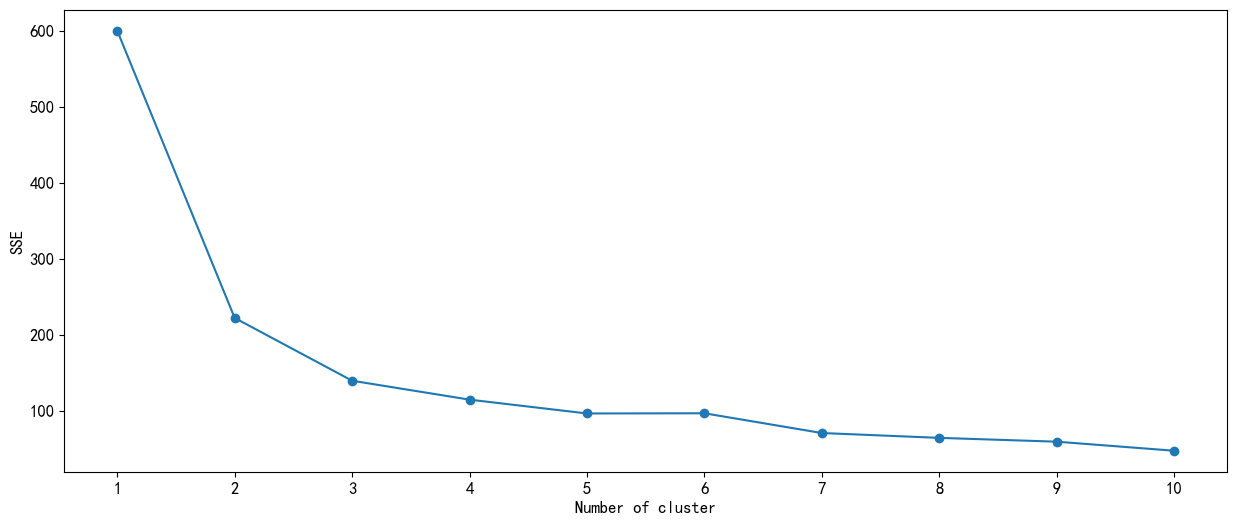

In [53]:
# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)

sse = {}  
for k in range(1, 11):  
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_scaled)  
    sse[k] = kmeans.inertia_  # inertia_ 属性给出的是SSE  
  
# 绘制肘部法则图：聚类内误差平方和（SSE）
# SSE随着k的增加而减少，但在某个点（即“肘部”）之后，SSE的减少变得不那么显著。
# 这个点通常被认为是最佳聚类数的指示。
plt.figure(figsize=(15, 6))  
plt.plot(list(sse.keys()), list(sse.values()))
plt.scatter(list(sse.keys()), list(sse.values()))
plt.xticks(range(1, 11))
plt.xlabel("Number of cluster")  
plt.ylabel("SSE")  
plt.show()

In [54]:
# 最终确定模型参数
kmeans_final = KMeans(n_clusters=4, max_iter=1000).fit(X_scaled)

# 输出结果
print("聚类结果：", kmeans_final.labels_)
print("聚类中心：", kmeans_final.cluster_centers_)

聚类结果： [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 3 1 1 2 1 1 1 2 1 2 2 1 2 1 2 1 1 2 2 2 1 1 1 1
 1 1 1 1 1 2 2 2 2 1 1 1 1 2 1 2 2 1 2 2 2 1 1 1 2 2 3 1 3 1 3 3 2 3 1 3 3
 1 3 1 1 3 1 3 3 2 3 1 3 1 3 3 1 1 1 3 3 3 1 1 1 3 3 1 1 3 3 3 1 3 3 3 1 1
 3 1]
聚类中心： [[-1.00206653  0.90625492 -1.30310821 -1.25634413]
 [ 0.40001883 -0.38096782  0.6096452   0.56232911]
 [-0.40591237 -1.35010403  0.0404493  -0.03751517]
 [ 1.40150837  0.23797961  1.17888943  1.24668215]]


d:\Coding\python\envs\py_ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
